## Preprocessing

In [ ]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Tensorflow
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [ ]:
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [ ]:
# Identify target and feature variables
target = 'IS_SUCCESSFUL'
cols_to_drop = ["EIN", "NAME"]

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [ ]:
# Determine the number of unique values in each column.
cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'IS_SUCCESSFUL']

for col in cols:
  print(col)
  print(df[col].nunique())
  print(df[col].value_counts())
  print()

APPLICATION_TYPE
17
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

AFFILIATION
6
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

CLASSIFICATION
71
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

USE_CASE
5
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

ORGANIZATION
4
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [ ]:
df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [ ]:
# Determine the number of unique values in each column.
unique_counts = df.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df["APPLICATION_TYPE"].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_counts = df["APPLICATION_TYPE"].value_counts()
app_type_counts.loc[app_type_counts < 500].index.tolist()


['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [ ]:
app_type_counts.index


Index(['T3', 'T4', 'T6', 'T5', 'T19', 'T8', 'T7', 'T10', 'T9', 'T13', 'T12',
       'T2', 'T25', 'T14', 'T29', 'T15', 'T17'],
      dtype='object', name='APPLICATION_TYPE')

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
app_type_counts = df["APPLICATION_TYPE"].value_counts()
application_types_to_replace = app_type_counts.loc[app_type_counts < threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df["CLASSIFICATION"].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = df["CLASSIFICATION"].value_counts()
class_counts.loc[class_counts > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [ ]:
class_counts = df["CLASSIFICATION"].value_counts()
class_counts.loc[class_counts < 500].index.tolist()

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_counts = df["CLASSIFICATION"].value_counts()
classifications_to_replace = class_counts.loc[class_counts < 500].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1484
C7000,777


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(df, dtype=int)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = df2.drop(columns=["IS_SUCCESSFUL"])
y = df2.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 44) (8575, 44)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train["ASK_AMT"].values.reshape(-1, 1))

# Scale the data (only on ASK_AMT)
X_train_scaled = X_train.copy()
X_train_scaled["ASK_AMT"] = X_scaler.transform(X_train["ASK_AMT"].values.reshape(-1, 1))

X_test_scaled = X_test.copy()
X_test_scaled["ASK_AMT"] = X_scaler.transform(X_test["ASK_AMT"].values.reshape(-1, 1))

## Compile, Train and Evaluate the Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow as tf

# Define the model
nn_model = tf.keras.models.Sequential()

# Hidden layers with more units and L2 regularization
nn_model.add(tf.keras.layers.Dense(units=550, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=X_train_scaled.shape[1]))
nn_model.add(tf.keras.layers.Dense(units=255, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#nn_model.add(tf.keras.layers.Dropout(0.4))
nn_model.add(tf.keras.layers.Dense(units=175, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#nn_model.add(tf.keras.layers.Dropout(0.4))
nn_model.add(tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#nn_model.add(tf.keras.layers.Dropout(0.4))
nn_model.add(tf.keras.layers.Dense(units=15, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#nn_model.add(tf.keras.layers.Dropout(0.4))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the Sequential model
nn_model.summary()

# Compile the model with lower learning rate
optimizer = Adam(learning_rate=0.0005)
nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 550)                 │          24,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 255)                 │         140,505 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 175)                 │          44,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           8,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             765 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,636 (857.95 KB)

 Trainable params: 219,636 (857.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
#history = nn_model.fit(X_train_scaled, y_train, epochs=250, validation_split=0.2)
history = nn_model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7114 - loss: 0.9582 - val_accuracy: 0.7236 - val_loss: 0.6586
Epoch 2/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7267 - loss: 0.6422 - val_accuracy: 0.7234 - val_loss: 0.6147
Epoch 3/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7210 - loss: 0.6117 - val_accuracy: 0.7258 - val_loss: 0.6013
Epoch 4/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7347 - loss: 0.5850 - val_accuracy: 0.7240 - val_loss: 0.5891
Epoch 5/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7307 - loss: 0.5820 - val_accuracy: 0.7240 - val_loss: 0.5826
Epoch 6/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7363 - loss: 0.5735 - val_accuracy: 0.7275 - val_loss: 0.5869
Epoch 7/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7338 - loss: 0.5755 - val_accuracy: 0.7254 - val_loss: 0.5816
Epoch 8/500
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7292 - loss: 0.5768 - val_accu

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7293 - loss: 0.5674
Loss: 0.5673577785491943, Accuracy: 0.7293294668197632


In [ ]:
# Export our model to HDF5 file
nn_model.save("AlphabetSoupCharity_Optimization.h5")

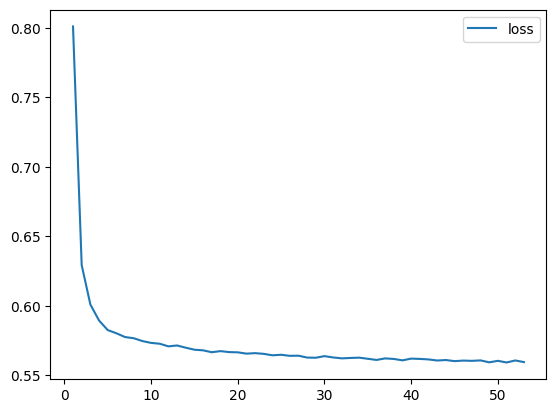

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(history.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

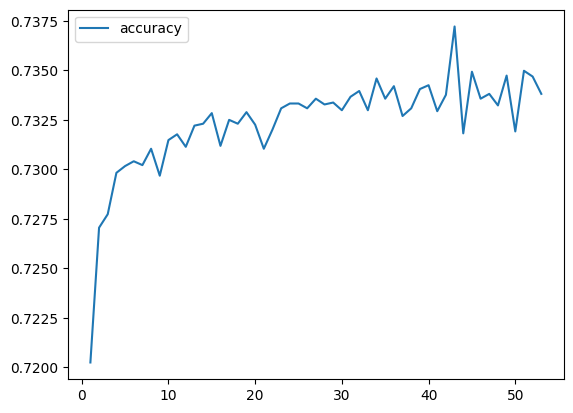

In [ ]:
 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

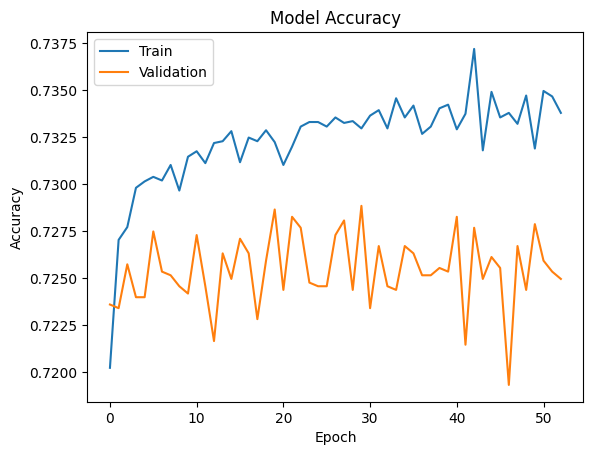

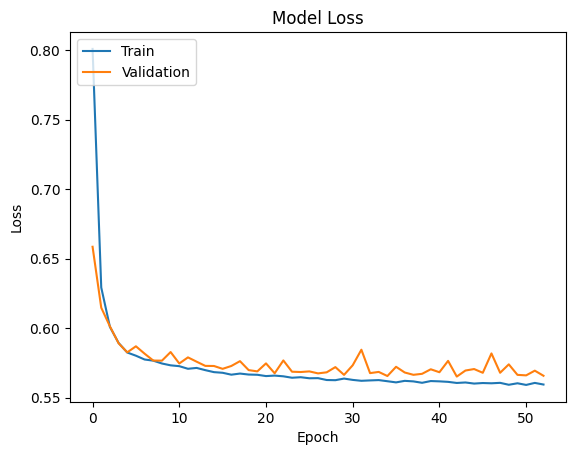

In [78]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('pictures/Model_Accuracy.png')  # Save the plot as an image
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('pictures/Model_Lost.png')  # Save the plot as an image
plt.show()



In [ ]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.43315290084914804

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.4274570965794714

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27   

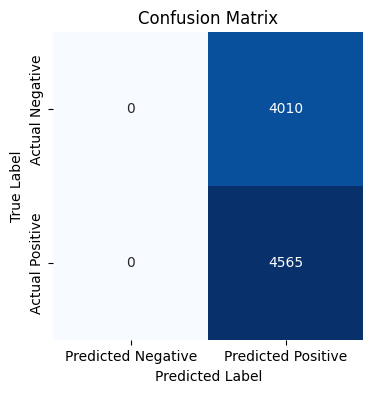

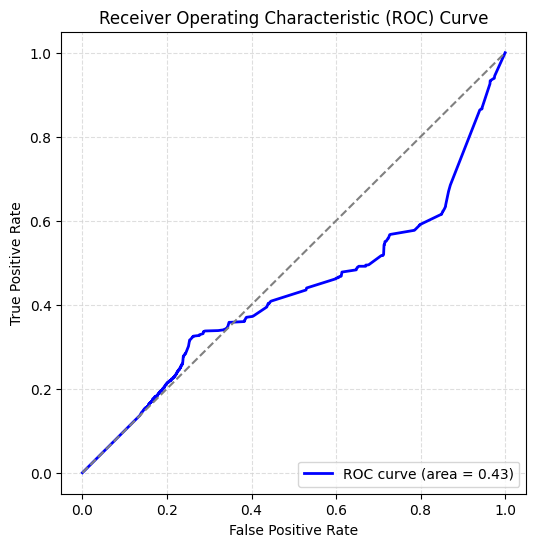

In [ ]:
doClassification_NN(nn_model, X_train, X_test, y_train, y_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Create the Keras Sequential model
nn_model2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model2.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model2.add(tf.keras.layers.Dense(units=5, activation="tanh"))

# Add the output layer that uses a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 5)                   │             225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn_model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.5302 - loss: 0.6938
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.5356 - loss: 0.6908
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.5314 - loss: 0.6913
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5336 - loss: 0.6912
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5339 - loss: 0.6910
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.5365 - loss: 0.6906
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.5337 - loss: 0.6910
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.5310 - loss: 0.6913
Epoch 9/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.5366 - loss: 0.6906
Epoch 10/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.5333 - loss: 0.6911
Epoch 11/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.5316 - loss: 0.6913
Epoch 12/50
804/804 ━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")# no much difference will leave epochs at 50

268/268 - 0s - 1ms/step - accuracy: 0.7293 - loss: 0.5674
Loss: 0.5673577785491943, Accuracy: 0.7293294668197632


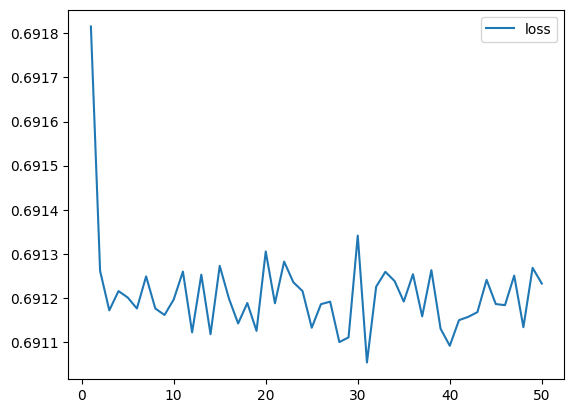

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

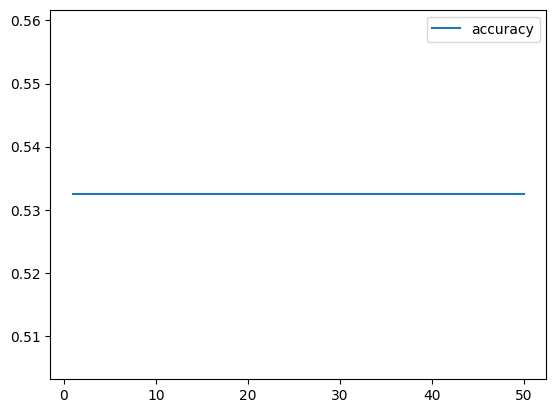

In [ ]:
 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.5000679513572692

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.5005324858718483

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27

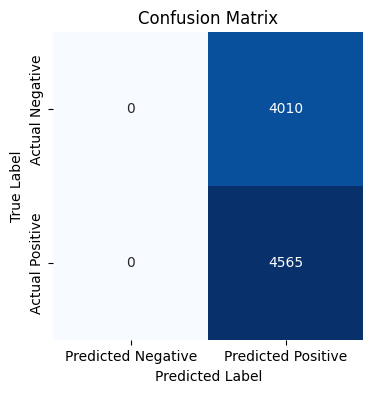

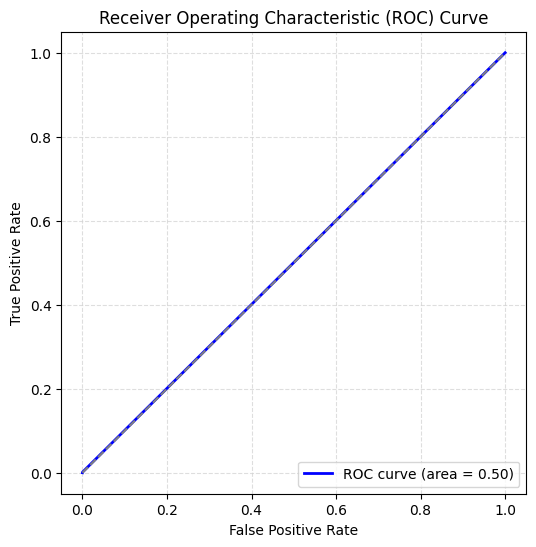

In [ ]:
doClassification_NN(nn_model2, X_train, X_test, y_train, y_test)

In [91]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)

    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.savefig('roc_curve.png')
    plt.show()

TRAIN METRICS
    Confusion Matrix:
    [[12028     0]
 [13696     0]]

    AUC: 0.60900687956198

    Classification Report:
                  precision    recall  f1-score   support

           0       0.47      1.00      0.64     12028
           1       0.00      0.00      0.00     13696

    accuracy                           0.47     25724
   macro avg       0.23      0.50      0.32     25724
weighted avg       0.22      0.47      0.30     25724

    
TEST METRICS
    Confusion Matrix:
    [[4010    0]
 [4565    0]]

    AUC: 0.6151675848713376

    Classification Report:
                  precision    recall  f1-score   support

           0       0.47      1.00      0.64      4010
           1       0.00      0.00      0.00      4565

    accuracy                           0.47      8575
   macro avg       0.23      0.50      0.32      8575
weighted avg       0.22      0.47      0.30      8575

    


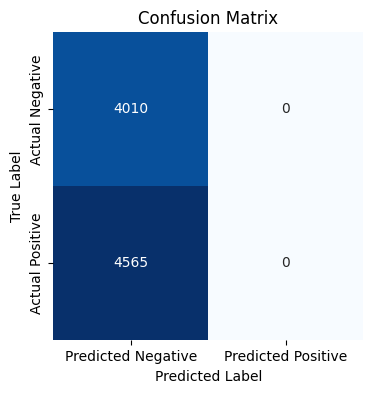

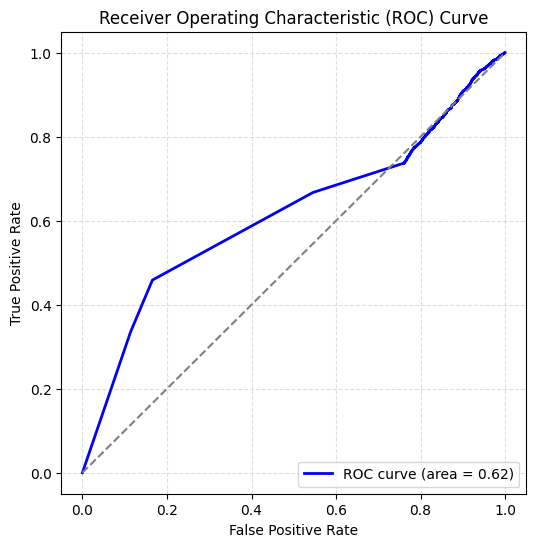

In [93]:
# Init the Model LogisticRegression
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix:
    [[ 8544  3484]
 [ 2769 10927]]

    AUC: 0.8233734858635924

    Classification Report:
                  precision    recall  f1-score   support

           0       0.76      0.71      0.73     12028
           1       0.76      0.80      0.78     13696

    accuracy                           0.76     25724
   macro avg       0.76      0.75      0.75     25724
weighted avg       0.76      0.76      0.76     25724

    
TEST METRICS
    Confusion Matrix:
    [[2693 1317]
 [1027 3538]]

    AUC: 0.7820831000264947

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.67      0.70      4010
           1       0.73      0.78      0.75      4565

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.73      8575

    


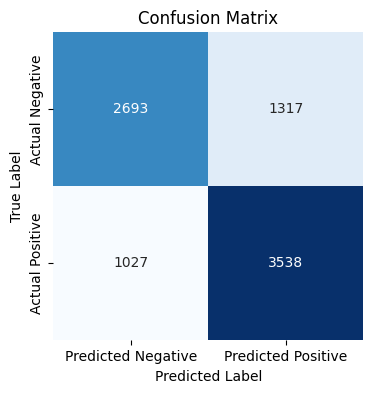

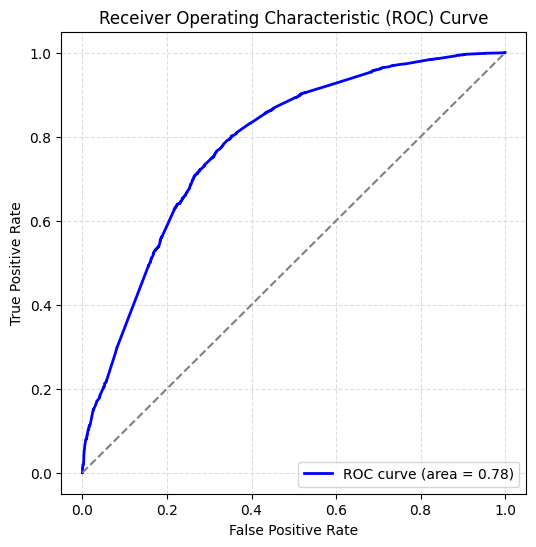

In [ ]:
# Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 9606  2422]
 [ 2253 11443]]

    AUC: 0.8808513348380648

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.80      0.80     12028
           1       0.83      0.84      0.83     13696

    accuracy                           0.82     25724
   macro avg       0.82      0.82      0.82     25724
weighted avg       0.82      0.82      0.82     25724

    
TEST METRICS
    Confusion Matrix:
    [[2721 1289]
 [1182 3383]]

    AUC: 0.753045890203298

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.68      0.69      4010
           1       0.72      0.74      0.73      4565

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575

    


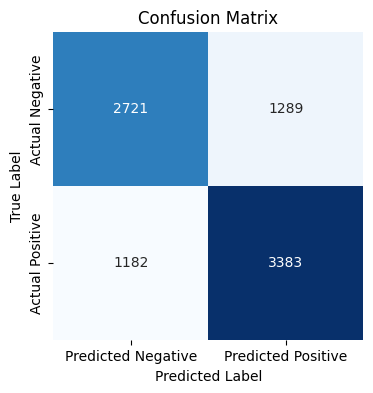

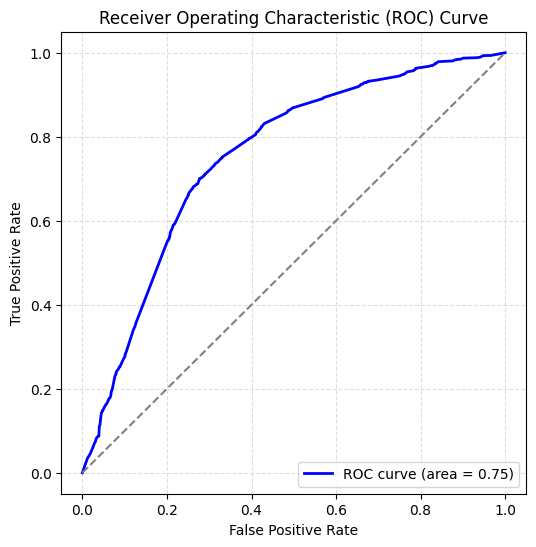

In [ ]:
# Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 6931  5097]
 [ 3160 10536]]

    AUC: 0.7572934800788036

    Classification Report:
                  precision    recall  f1-score   support

           0       0.69      0.58      0.63     12028
           1       0.67      0.77      0.72     13696

    accuracy                           0.68     25724
   macro avg       0.68      0.67      0.67     25724
weighted avg       0.68      0.68      0.68     25724

    
TEST METRICS
    Confusion Matrix:
    [[2249 1761]
 [1141 3424]]

    AUC: 0.7338548480933483

    Classification Report:
                  precision    recall  f1-score   support

           0       0.66      0.56      0.61      4010
           1       0.66      0.75      0.70      4565

    accuracy                           0.66      8575
   macro avg       0.66      0.66      0.66      8575
weighted avg       0.66      0.66      0.66      8575

    


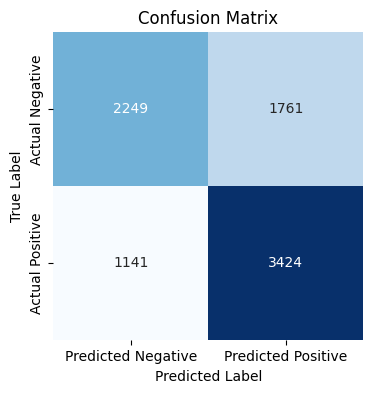

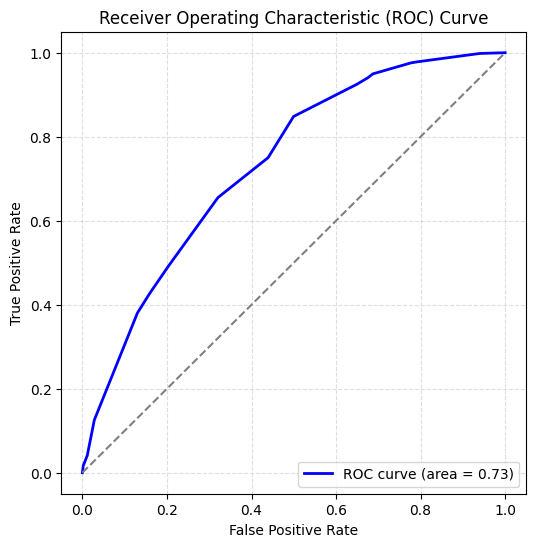

In [ ]:
# Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 8110  3918]
 [ 2991 10705]]

    AUC: 0.7887502175608938

    Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70     12028
           1       0.73      0.78      0.76     13696

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    
TEST METRICS
    Confusion Matrix:
    [[2656 1354]
 [1003 3562]]

    AUC: 0.7819677258114298

    Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.66      0.69      4010
           1       0.72      0.78      0.75      4565

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575

    


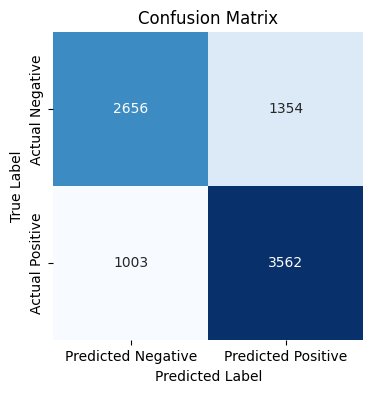

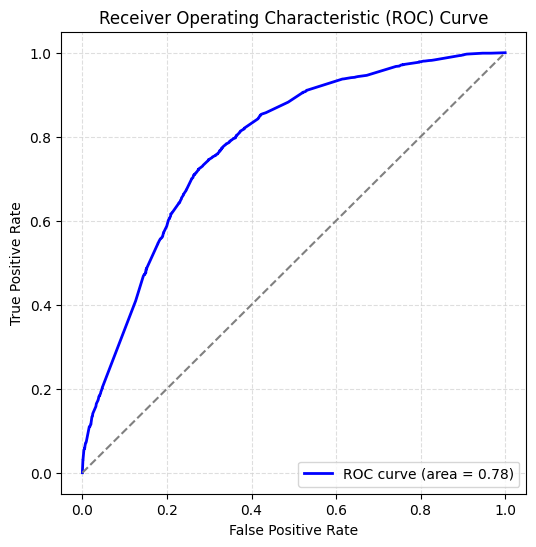

In [94]:
# GradientBoostingClassifier: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)


TRAIN METRICS
    Confusion Matrix:
    [[ 8092  3936]
 [ 3194 10502]]

    AUC: 0.7654632558589927

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.67      0.69     12028
           1       0.73      0.77      0.75     13696

    accuracy                           0.72     25724
   macro avg       0.72      0.72      0.72     25724
weighted avg       0.72      0.72      0.72     25724

    
TEST METRICS
    Confusion Matrix:
    [[2646 1364]
 [1033 3532]]

    AUC: 0.7612050651028506

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.66      0.69      4010
           1       0.72      0.77      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

    


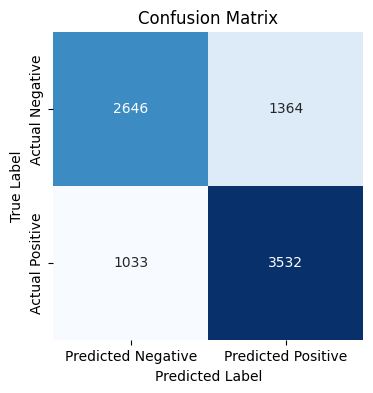

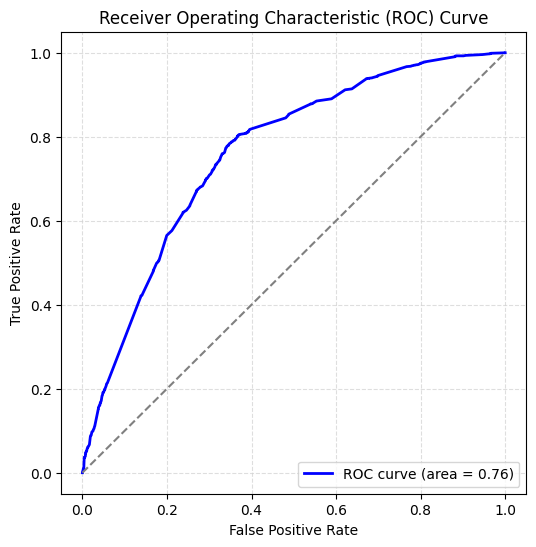

In [ ]:
# AdaBoostClassifier: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 9634  2394]
 [ 2279 11417]]

    AUC: 0.9000460210492107

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.80      0.80     12028
           1       0.83      0.83      0.83     13696

    accuracy                           0.82     25724
   macro avg       0.82      0.82      0.82     25724
weighted avg       0.82      0.82      0.82     25724

    
TEST METRICS
    Confusion Matrix:
    [[2731 1279]
 [1233 3332]]

    AUC: 0.7083291497433852

    Classification Report:
                  precision    recall  f1-score   support

           0       0.69      0.68      0.68      4010
           1       0.72      0.73      0.73      4565

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575

    


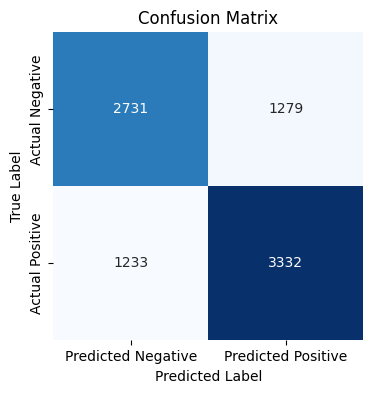

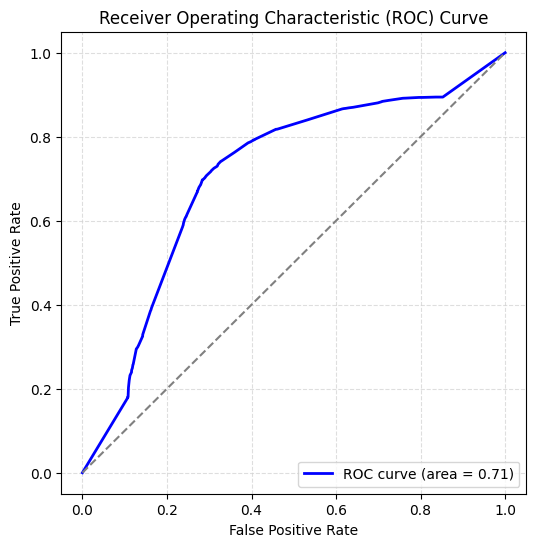

In [ ]:
# DecisionTreeClassifier: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 9634  2394]
 [ 2279 11417]]

    AUC: 0.9000460210492107

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.80      0.80     12028
           1       0.83      0.83      0.83     13696

    accuracy                           0.82     25724
   macro avg       0.82      0.82      0.82     25724
weighted avg       0.82      0.82      0.82     25724

    
TEST METRICS
    Confusion Matrix:
    [[2730 1280]
 [1196 3369]]

    AUC: 0.7394360211191627

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.68      0.69      4010
           1       0.72      0.74      0.73      4565

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575

    


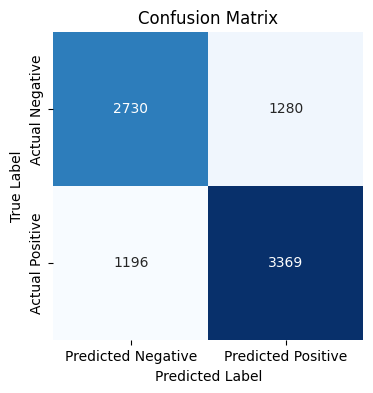

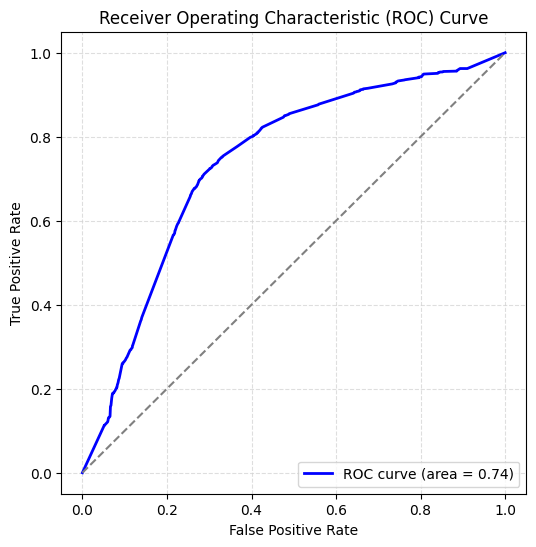

In [ ]:
# ExtraTreesClassifier: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Create a DataFrame for the current model's results
    model_results = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }])

    # Append the current model's results to the results DataFrame
    global results
    results = pd.concat([results, model_results], ignore_index=True)

# Instantiate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'DT': DecisionTreeClassifier()
}

# Evaluate models
for model_name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test, model_name)

# Print results
print(results)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.467638   0.000000  0.000000  0.000000
1        Random Forest  0.711837   0.727115  0.734283  0.730681
2             AdaBoost  0.720466   0.721405  0.773713  0.746644
3          Extra Trees  0.711487   0.725081  0.737788  0.731379
4    Gradient Boosting  0.725131   0.724573  0.780285  0.751398
5          K-Neighbors  0.654344   0.639825  0.802410  0.711953
6              XGBoost  0.726647   0.728733  0.775027  0.751168
7                   DT  0.707638   0.723114  0.730559  0.726817


In [ ]:
# Create DataFrame with results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "AdaBoost", "Extra Trees",
              "Gradient Boosting", "K-Neighbors", "XGBoost", "DT"],
    "Accuracy": [0.467638, 0.711837, 0.720466, 0.710554, 0.725131,
                 0.654344, 0.726647, 0.706122],
    "Precision": [0.000000, 0.724005, 0.721405, 0.724316, 0.724573,
                  0.639825, 0.728733, 0.722041],
    "Recall": [0.000000, 0.741292, 0.773713, 0.736692, 0.780285,
               0.802410, 0.775027, 0.728368],
    "F1-Score": [0.000000, 0.732547, 0.746644, 0.730452, 0.751398,
                 0.711953, 0.751168, 0.725191]
})

# Sort results by F1-Score in descending order
sorted_results = results.sort_values(by="F1-Score", ascending=False)

# Print sorted results
print(sorted_results)

                 Model  Accuracy  Precision    Recall  F1-Score
4    Gradient Boosting  0.725131   0.724573  0.780285  0.751398
6              XGBoost  0.726647   0.728733  0.775027  0.751168
2             AdaBoost  0.720466   0.721405  0.773713  0.746644
1        Random Forest  0.711837   0.724005  0.741292  0.732547
3          Extra Trees  0.710554   0.724316  0.736692  0.730452
7                   DT  0.706122   0.722041  0.728368  0.725191
5          K-Neighbors  0.654344   0.639825  0.802410  0.711953
0  Logistic Regression  0.467638   0.000000  0.000000  0.000000


                 Model  Accuracy  Precision    Recall  F1-Score
4    Gradient Boosting  0.725131   0.724573  0.780285  0.751398
6              XGBoost  0.726647   0.728733  0.775027  0.751168
2             AdaBoost  0.720466   0.721405  0.773713  0.746644
1        Random Forest  0.711837   0.724005  0.741292  0.732547
3          Extra Trees  0.710554   0.724316  0.736692  0.730452
7                   DT  0.706122   0.722041  0.728368  0.725191
5          K-Neighbors  0.654344   0.639825  0.802410  0.711953
0  Logistic Regression  0.467638   0.000000  0.000000  0.000000


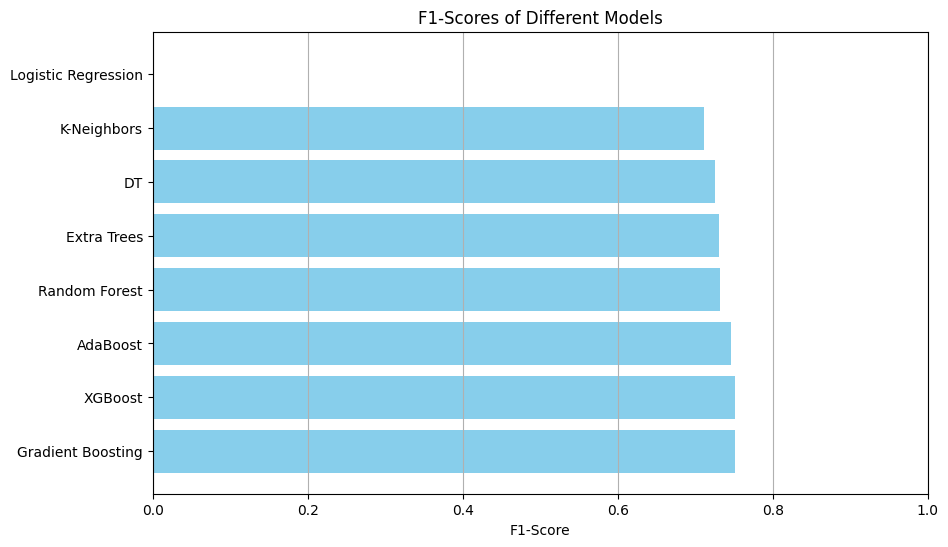

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Create directory if it doesn't exist
os.makedirs('deep-learning-challenge', exist_ok=True)

# Create DataFrame with results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "AdaBoost", "Extra Trees",
              "Gradient Boosting", "K-Neighbors", "XGBoost", "DT"],
    "Accuracy": [0.467638, 0.711837, 0.720466, 0.710554, 0.725131,
                 0.654344, 0.726647, 0.706122],
    "Precision": [0.000000, 0.724005, 0.721405, 0.724316, 0.724573,
                  0.639825, 0.728733, 0.722041],
    "Recall": [0.000000, 0.741292, 0.773713, 0.736692, 0.780285,
               0.802410, 0.775027, 0.728368],
    "F1-Score": [0.000000, 0.732547, 0.746644, 0.730452, 0.751398,
                 0.711953, 0.751168, 0.725191]
})

# Sort results by F1-Score in descending order
sorted_results = results.sort_values(by="F1-Score", ascending=False)

# Print sorted results
print(sorted_results)

# Plotting F1-Scores
plt.figure(figsize=(10, 6))
plt.barh(sorted_results['Model'], sorted_results['F1-Score'], color='skyblue')
plt.xlabel('F1-Score')
plt.title('F1-Scores of Different Models')
plt.xlim(0, 1)  # Set x-axis limits to show the range of F1-Scores
plt.grid(axis='x')  # Add gridlines for better readability
plt.savefig('pictures/Model_Evaluation_Comparisson.png')  # Save the plot as an image
plt.show()

# Create directory if it doesn't exist
os.makedirs('pictures', exist_ok=True)